In [1]:
import numpy as np
from scipy.optimize import minimize

# Part A: Lasso Regression

## Implement Lasso Regression Class

The cell below contains a partial implementation of the `LassoRegression` class, which implements the lasso regression variant of linear regression. Complete this class by writing the `cost()` function. The rest of the code is complete. See the printed lab instructions for details on how the `cost()` function is calculated. 

In [2]:
class LassoRegression:
    
    def __init__(self, X, y, alpha=0):
        
        def cost(beta):
            y_hat = beta[0] + np.sum(beta[1:] * self.X, axis=1)
            mse = np.sum((self.y - y_hat)**2) / self.n_observations
            cost = mse + self.alpha*np.sum(np.abs(beta[1:]))
            return cost
        
        self.X = np.array(X)
        self.y = np.array(y)
        self.n_observations = len(y)
        self.alpha = alpha
        
        beta_guess = np.zeros(self.X.shape[1] + 1)
        min_results = minimize(cost, beta_guess)
        self.coefficients = np.round(min_results.x,5)
        
        self.r_squared = self.score(self.X, self.y)
       
    def predict(self, X):
        X = np.array(X)
        return self.coefficients[0] + np.sum(self.coefficients[1:]*X, axis=1)

    def score(self,X,y):
        X, y = np.array(X), np.array(y)
        y_hat = self.predict(X)
        sse = np.sum( (y - y_hat)**2 )
        return 1 - sse / np.sum((y - np.mean(y))**2)

## Create Training and Testing Data

The cell below creates a simulated set of training data, and a simulated set of testing data. Run the cell as is. This will create the arrays `X_train`, `X_test`, `y_train`, and `y_test`.

In [3]:
np.random.seed(2560)

X_train = np.random.uniform(0,10,1000).reshape(50,20)
y_train = 3 + 1.3 * X_train[:,5] + 2.5 * X_train[:,13] + np.random.normal(0,4,50)

X_test = np.random.uniform(0,10,400).reshape(20,20)
y_test = 3 + 1.3 * X_test[:,5] + 2.5 * X_test[:,13] + np.random.normal(0,4,20)

## Create Models
In the cell below, create two lasso regression models, as described below.
* In the first model, set $\alpha = 0$. In the second model, set $\alpha = 10$.
* Both models should be trained using `X_train` and `y_train`. 
* For each model, print the coefficients of the model. 
* For each model, print the training and testing accuracy of the model. Use the `score()` method.

Some of the code is already provided for you below. 

In [4]:
# Create both models. 
mod0 = LassoRegression(X_train, y_train, 0)
mod10 = LassoRegression(X_train, y_train, 10)

print('+-----------+')
print('| alpha = 0 |')
print('+-----------+')
print('Coefficients', mod0.coefficients)

print('\nTraining r^2:', mod0.score(X_train, y_train))
print('Testing r^2:', mod0.score(X_test, y_test))

print('\n')
print('+------------+')
print('| alpha = 10 |')
print('+------------+')
print('Coefficients', mod10.coefficients)

print('\nTraining r^2:', mod10.score(X_train, y_train))
print('Testing r^2:', mod10.score(X_test, y_test))

+-----------+
| alpha = 0 |
+-----------+
Coefficients [-0.95987  0.36125 -0.28584 -0.2507  -0.05287 -0.03452  1.77786  0.15545
 -0.1915   0.14638 -0.49874  0.27353  0.36016  0.02154  2.77256 -0.07202
 -0.22947 -0.37536 -0.10828  0.26776  0.39694]

Training r^2: 0.845598805678
Testing r^2: 0.427896532404


+------------+
| alpha = 10 |
+------------+
Coefficients [ 7.78353 -0.      -0.      -0.      -0.      -0.       0.76341 -0.      -0.
 -0.      -0.      -0.      -0.      -0.       1.84888  0.      -0.      -0.
 -0.      -0.      -0.     ]

Training r^2: 0.689765252316
Testing r^2: 0.644308357333


## Compare the Models

In the cell below, answer the following questions:
1. Which of the two models created above do you prefer, and why?
2. What do you notice about the differences in the coefficients in the two models?

**(Answer questions here.)**

## Finding the Best Alpha

Run the cell below. This will generate a plot of the training and testing r-squared values, as then depend on alpha. Then answer the question asked in the cell below the plot. 

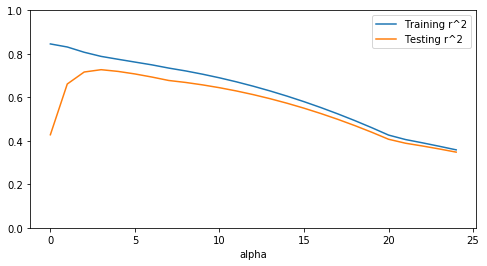

In [5]:
testing_r2 = [] 
training_r2 = []
for i in range(25):
    mod = LassoRegression(X_train, y_train, i)
    training_r2.append(mod.score(X_train, y_train))
    testing_r2.append(mod.score(X_test, y_test))

import matplotlib.pyplot as plt

plt.close()
plt.figure(figsize=[8,4])
plt.plot(training_r2, label='Training r^2')
plt.plot(testing_r2, label='Testing r^2')
plt.ylim([0,1])
plt.xlabel('alpha')
plt.legend()
plt.show()

What do you consider to be the optimal value for alpha? Why?

**(Answer questions here.)**




# Part B: Multiclass Logistic Regression

In this part, we will implement a multiclass classification model using several binary logistic regression classifiers. Running the cell below will load the `LogisticRegression` class into your workspace. Recall that this class contains the following methods:

* `predict_proba(self, X)` 
* `predict(self, X, t=0.5)`

It also contains methods called `summary()`, `score()`, and `confusion_matrix()`, but you will not need those for this lab.

In [6]:
from LogisticRegression import LogisticRegression

The cell below contains a partial implementation of a class called `MultiClassLogisticRegresion`. This class implements our  multiclass classification algorithm. See the print lab instructions for details on how the algorithm works. 

Complete this class by finishing the constructor and the `predict()` method. They are explained in the lab instructions. 

In [7]:
class MultiClassLogisticRegression:
   
    def __init__(self, X, y):
                
        self.X = np.array(X)
        self.y = np.array(y)
        self.classes = np.unique(y)
        self.models = []
        
        # Create one model for each class. Store in self.models. 
        for K in self.classes:
            y_K = np.where(y == K, 'y', 'n')
            mod = LogisticRegression(X, y_K)
            self.models.append(mod)
    
    def predict(self, X):
        X = np.array(X)

        pred = np.zeros(X.shape[0])
        prob = np.zeros(X.shape[0])
                
        for i in range(len(self.classes)):
            prob_K = self.models[i].predict_proba(X)
            pred = np.where(prob_K > prob, self.classes[i], pred)
            prob = np.where(prob_K > prob, prob_K, prob)
            
        return pred
            
    def score(self, X, y):
        X = np.array(X)
        y = np.array(y)
        predictions = self.predict(X)
        acc = np.sum(y == predictions) / len(y)
        return acc

## Apply the Model

The two cells create a synthetic dataset, which is then split into training and testing sets. A multiclass logistic model is then trained on the training data, and the training and testing accuracies are printed. 

Run both of these cells. You should get the following output:

    Training Accuracy: 0.73125
    Testing Accuracy: 0.705

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [9]:
X2, y2 = make_classification(n_samples = 1000, n_features = 6, n_informative = 6,
                             n_redundant = 0, n_classes = 4, random_state=39)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state=1)

mc_mod = MultiClassLogisticRegression(X2_train, y2_train)

print('Training Accuracy:', mc_mod.score(X2_train, y2_train))
print('Testing Accuracy:', mc_mod.score(X2_test, y2_test))

Training Accuracy: 0.73125
Testing Accuracy: 0.705
